# Feature analysis

Import libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from models.processing import BinaryClassEDA, get_table_description

sns.set()
%matplotlib inline

### 1. Get description of each column in datasets:

In [2]:
application_description = get_table_description('data/HomeCredit_columns_description.csv',
                                                'application_{train|test}.csv')

application_description.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Description,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,Did client provide document 18,Did client provide document 19,Did client provide document 20,Did client provide document 21,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...,Number of enquiries to Credit Bureau about the...


### 2. Load data to EDA processor

In [3]:
application_train = pd.read_csv('data/application_train.csv')
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
eda_proc = BinaryClassEDA(data=application_train,
                          target_column='TARGET',
                          id_column='SK_ID_CURR',
                          table_description=application_description)

### 3. Split features on "Categorical" (nominal, binary) and "Numerical"(continuous). 

In [5]:
eda_proc.count_column_dtypes()

,Continuous,Binary,Nominal,Unknown
N columns,63,36,12,9


#### 3.1 Show "Unknown" :

In [6]:
eda_proc.get_dtype_info('Unknown')

Unknown  Data

 CNT_CHILDREN  -  Number of children the client has 
 0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64

 REGION_RATING_CLIENT  -  Our rating of the region where client lives (1,2,3) 
 2    0.738133
3    0.157165
1    0.104702
Name: REGION_RATING_CLIENT, dtype: float64

 REGION_RATING_CLIENT_W_CITY  -  Our rating of the region where client lives with taking city into account (1,2,3) 
 2    0.746263
3    0.142629
1    0.111108
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64

 DEF_30_CNT_SOCIAL_CIRCLE  -  How many observation of client's social surroundings defaulted on 30 DPD (days past due)  
 0.0     0.882323
1.0     0.092120
2.0     0.017310
3.0     0.003876
NaN     0.003320
4.0     0.000823
5.0     0.000182
6.0     0.000036
7.0     0.000003
8.0     0.000003
34

All of these features are **Numerical**. Move them from *'Unknown'* to *'Continuous'*

In [7]:
eda_proc.change_dtype_group(new_dtype='Continuous',
                            old_dtype='Unknown')
eda_proc.count_column_dtypes()

,Continuous,Binary,Nominal,Unknown
N columns,72,36,12,0


Some of features contains outliers in data. Add them to drop list.

In [8]:
rows_to_drop = []

rows_to_drop.extend(np.where(application_train['AMT_REQ_CREDIT_BUREAU_QRT']==261)[0])
rows_to_drop.extend(np.where(application_train['DEF_60_CNT_SOCIAL_CIRCLE']==24)[0])
rows_to_drop.extend(np.where(application_train['DEF_30_CNT_SOCIAL_CIRCLE']==34)[0])
rows_to_drop.extend(np.where(application_train['CNT_CHILDREN']==19)[0])

print(f"Rows to drop {rows_to_drop}")

Rows to drop [239474, 148403, 148403, 155369, 265784]


#### 3.2 Show "Nominal":

In [9]:
eda_proc.get_dtype_info('Nominal')

Nominal  Data

 CODE_GENDER  -  Gender of the client 
 F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

 NAME_TYPE_SUITE  -  Who was accompanying client when he was applying for the loan 
 Unaccompanied      0.808186
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
NaN                0.004201
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

 NAME_INCOME_TYPE  -  Clients income type (businessman, working, maternity leave,) 
 Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

 NAME_EDUCATION_TYPE  -  Level of highest education the client achieved 
 Secondary / secondary special    0.710189
Higher e

**CODE_GENDER** - binary feature

**NAME_EDUCATION_TYPE** - ordinal feature

**ORGANIZATION_TYPE** - contains a lot of values, could be useless

In [10]:
# Move CODE_GENDER to "Binary"
eda_proc.change_dtype_group(new_dtype='Binary', change_columns=['CODE_GENDER'])

# Create new dtype groups and fill them
eda_proc.create_dtype_group('Useless')
eda_proc.change_dtype_group(new_dtype='Useless', change_columns=['ORGANIZATION_TYPE'])

eda_proc.create_dtype_group('Ordinal')
eda_proc.change_dtype_group(new_dtype='Ordinal', change_columns=['NAME_EDUCATION_TYPE'])

eda_proc.count_column_dtypes()

,Continuous,Binary,Nominal,Unknown,Useless,Ordinal
N columns,72,37,9,0,1,1


### 4. Categorical feature Analysis

#### 4.1 Distribution of "Nominal":

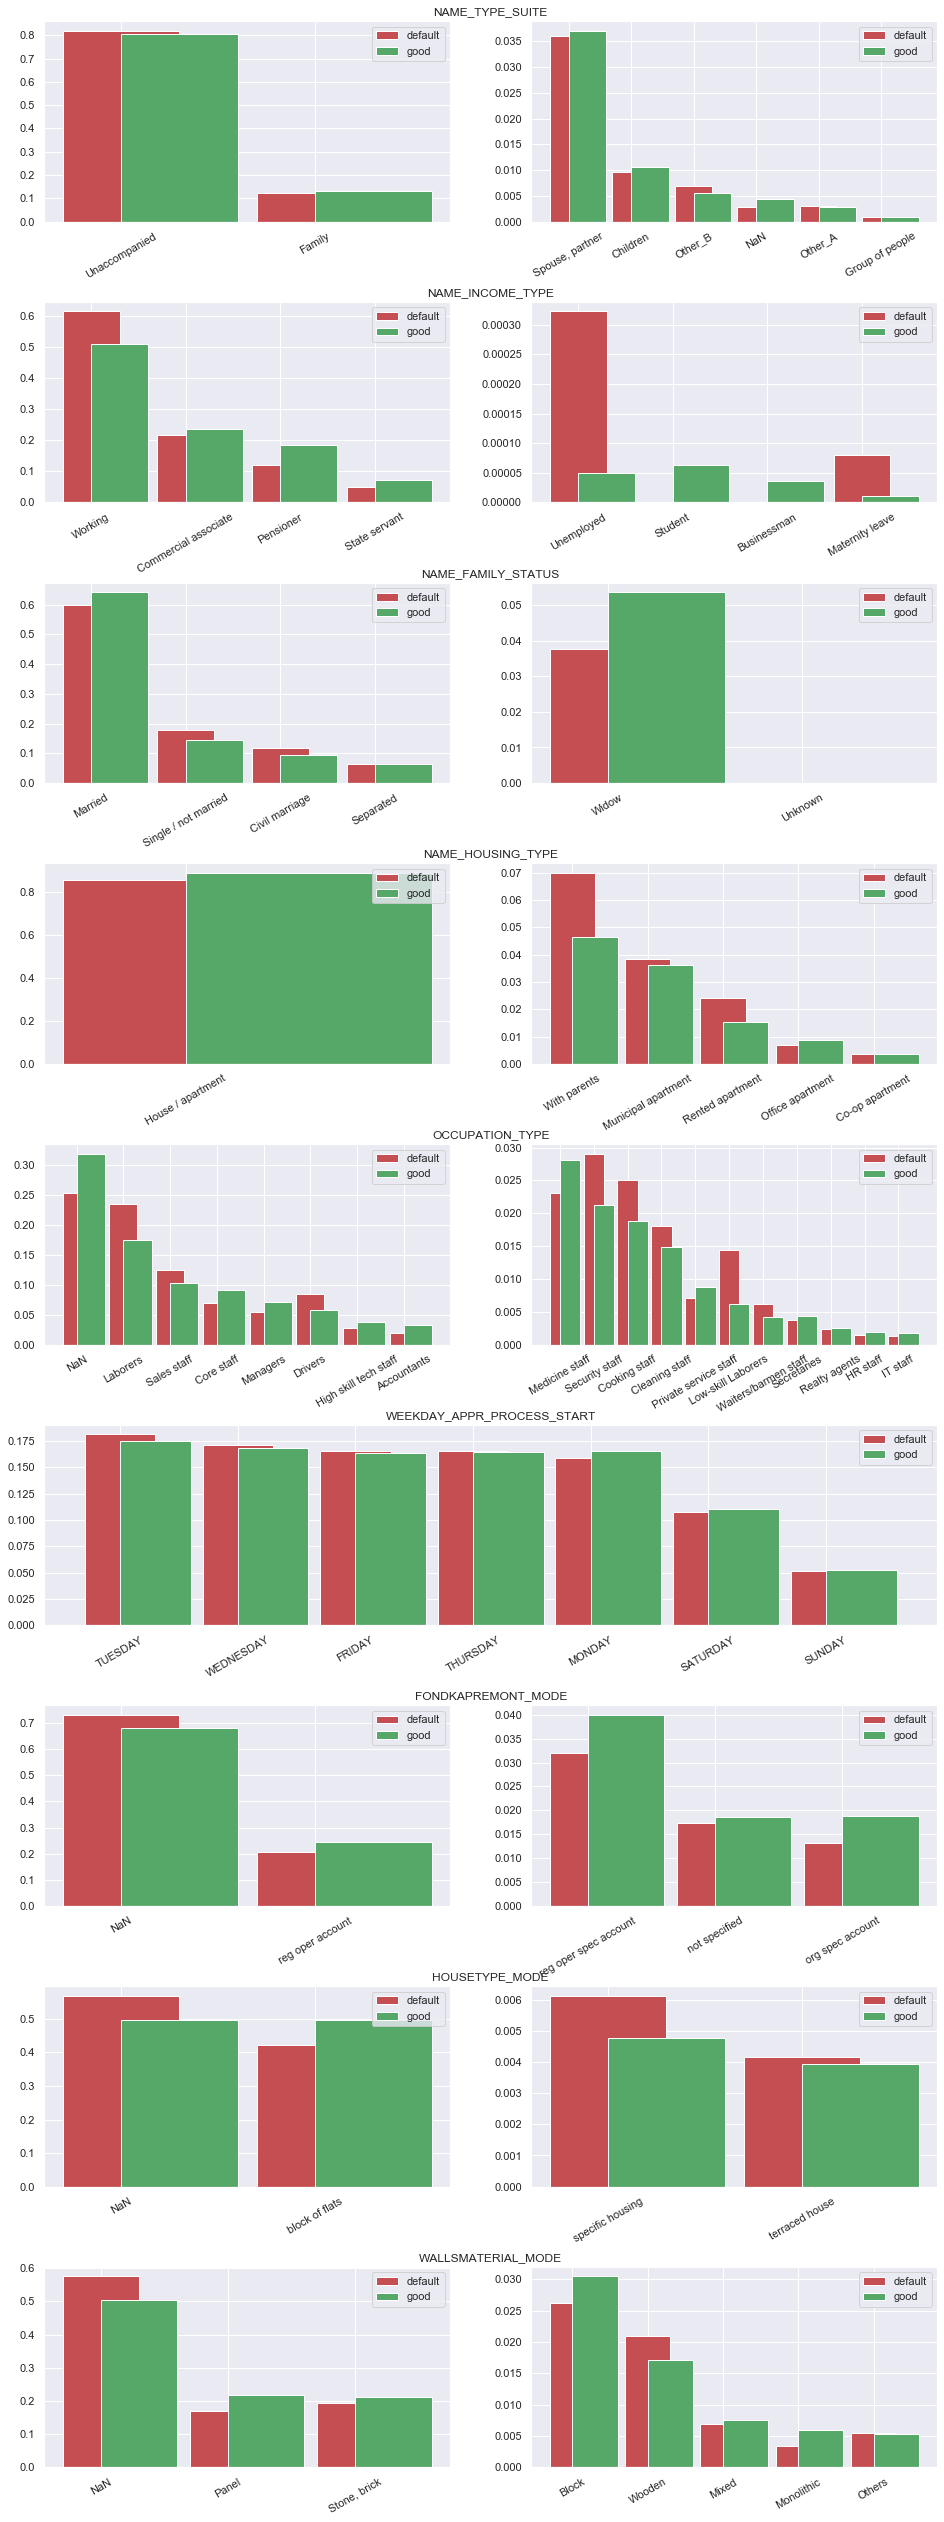

In [11]:
eda_proc.plot_categorical_dist_by_target(plot_dtype='Nominal',
                                         positive_name='default',
                                         negative_name='good')

1. **NAME_TYPE_SUITE**: >>>>  to "Unaccompanied" and "Accompanied"
2. **NAME_INCOME_TYPE**: as we can see "Unemployed" and "Maternity leave" are at **risk**.
3. **NAME_FAMILY_STATUS**: >>>> to "Have pair" and "Dont"
4. **NAME_HOUSING_TYPE**: >>>> to "Own house" and "Dont"
5. **OCCUPATION_TYPE**: could be useless or transformed to ordinal data (very high skill, high, medium, low, very low)
6. **WEEKDAY_APPR_PROCESS_START**: >>>> to "Weekday" and "Weekend"
7. **ORGANIZATION_TYPE**: useless, a lot of values
8. **FONDKAPREMONT_MODE**: >>>> to "reg oper account" and "not"
9. **HOUSETYPE_MODE**: >>>> to "flats" and "not"
10. **WALLSMATERIAL_MODE**: >>>> to "Popular" and "not"

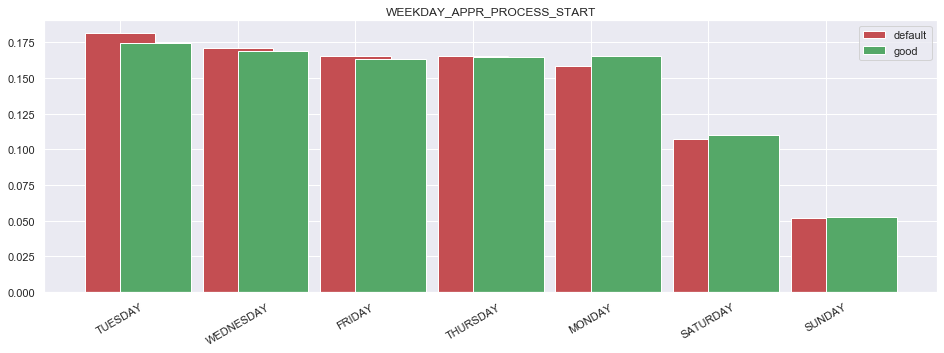

In [12]:
eda_proc.plot_categorical_dist_by_target(plot_columns=['WEEKDAY_APPR_PROCESS_START'])

Close to binary (can transform to binary):
* **HOUSETYPE_MODE** - could tranform to (Flats - 98%, Not Flats - 2%)
* **NAME_TYPE_SUITE** - could tranform to (Unaccompanied - 81%, accompanied - 19%)
* **NAME_FAMILY_STATUS** - could tranform to (Have pair - 70%, Dont have pair - 30%)
* **NAME_HOUSING_TYPE** - could tranform to (House - 89%, Not house - 11%)
* **WEEKDAY_APPR_PROCESS_START** - could tranform to (Weekday - 84%, Weekend - 16%)
* **FONDKAPREMONT_MODE** - could tranform to (Reg oper account - 76%, Other account - 24%)

#### 4.2 Create transformation dictionary for categories

In [13]:
transform_categories = dict()
              
transform_categories['HOUSETYPE_MODE'] = {"block of flats": 1,
                                          "specific housing": 0,
                                          "terraced house": 0,
                                           np.nan: 1}          

transform_categories['NAME_TYPE_SUITE'] = {"Unaccompanied": 1,
                                           "Family": 0,
                                           "Spouse, partner": 0,
                                           "Children": 0,
                                           "Other_B": 0,
                                           "Other_A": 0,
                                           "Group of people": 0,
                                            np.nan: 1,}   

transform_categories['NAME_FAMILY_STATUS'] = {"Married": 1,
                                              "Unknown": 1,
                                              "Civil marriage": 1,
                                              "Single / not married": 0,
                                              "Separated": 0,
                                              "Widow": 0,
                                               np.nan: 1}

transform_categories['NAME_HOUSING_TYPE'] = {"House / apartment": 1,
                                             "With parents": 0,
                                             "Municipal apartment": 0,
                                             "Rented apartment": 0,
                                             "Office apartment": 0,
                                             "Co-op apartment": 0,
                                              np.nan: 1}


transform_categories['WEEKDAY_APPR_PROCESS_START'] = {"MONDAY": 1,
                                                      "TUESDAY": 1,
                                                      "WEDNESDAY": 1,
                                                      "THURSDAY": 1,
                                                      "FRIDAY": 1,
                                                      "SATURDAY": 0,
                                                      "SUNDAY": 0,
                                                       np.nan: 1}

transform_categories['FONDKAPREMONT_MODE'] = {"reg oper account": 1,
                                              "reg oper spec account": 0,
                                              "not specified": 0,
                                              "org spec account": 0,
                                               np.nan: 1}

#### 4.3 Distribution of "Binary":

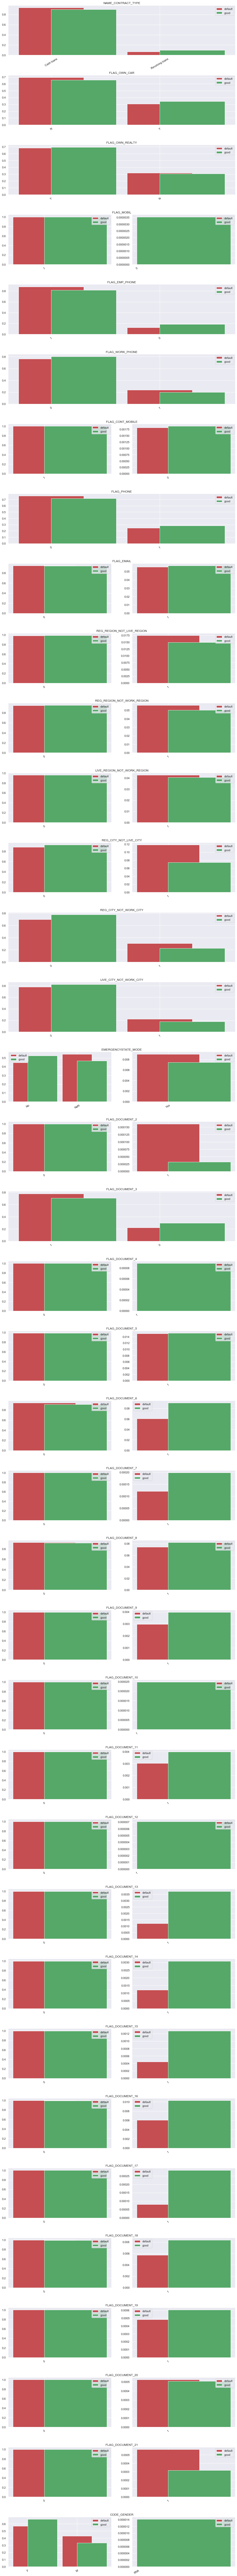

In [14]:
eda_proc.plot_categorical_dist_by_target(plot_dtype='Binary')

No insights. Some features have very big disbalance of categories.

#### 4.4 Distribution of "Ordinal":

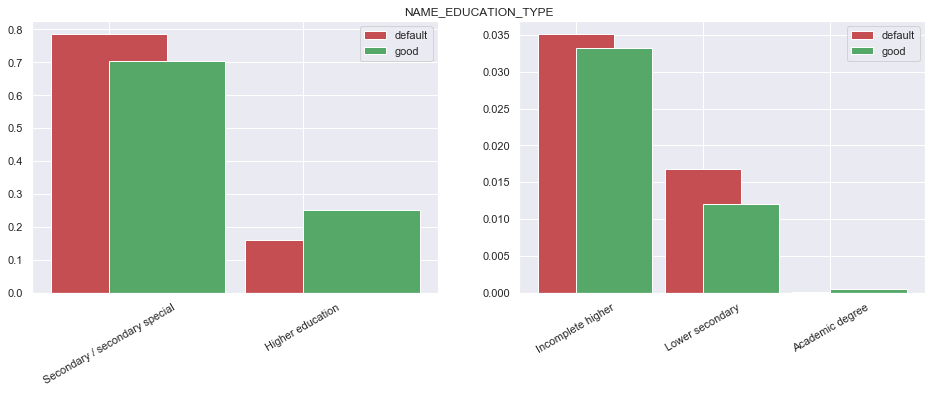

In [15]:
eda_proc.plot_categorical_dist_by_target(plot_dtype='Ordinal')

In [16]:
transform_categories['NAME_EDUCATION_TYPE'] = {"Lower secondary": 1,
                                               "Secondary / secondary special": 2,
                                               "Incomplete higher": 3,
                                               "Higher education": 4,
                                               "Academic degree": 5,
                                                np.nan: 2}

#### 4.5 Distribution of "Useless":

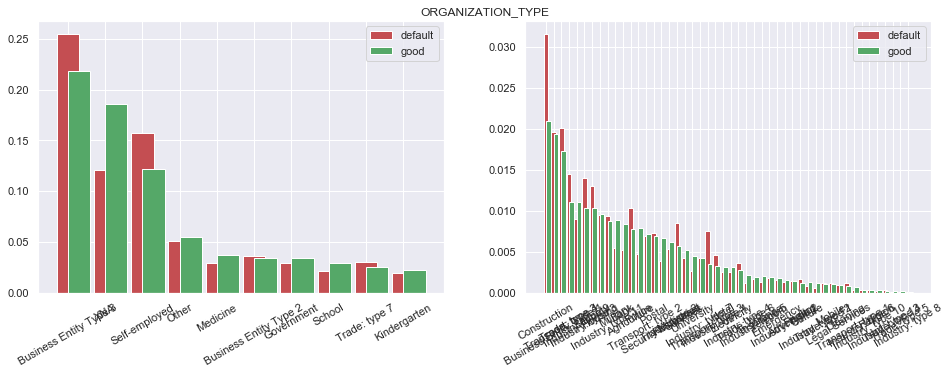

In [17]:
eda_proc.plot_categorical_dist_by_target(plot_dtype='Useless')